# Aditya Astonkar

# Task 2: Prediction using unsupervised machine learning

K-Means Clustring

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


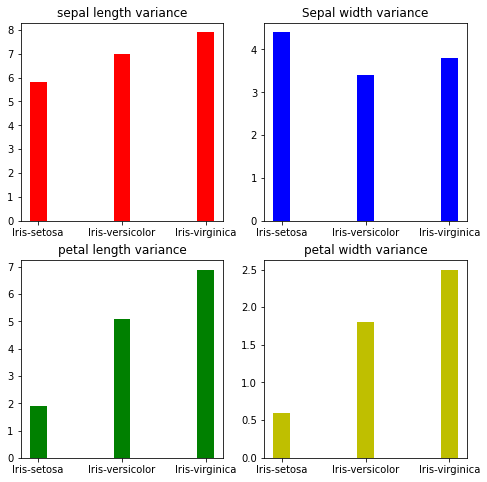

In [5]:
plt.figure(figsize=(8,8))
ad = plt.subplot(221)
ad.bar(df['Species'],df['SepalLengthCm'], width=0.2,color='r',align='center')
plt.title('sepal length variance')

ad=plt.subplot(222)
ad.bar(df['Species'], df['SepalWidthCm'], width=0.2,color='b',align='center')
plt.title('Sepal width variance')

ad=plt.subplot(223)
ad.bar(df['Species'], df['PetalLengthCm'], width=0.2,color='g',align='center')
plt.title('petal length variance')

ad=plt.subplot(224)
ad.bar(df['Species'], df['PetalWidthCm'], width=0.2,color='y',align='center')
plt.title('petal width variance')
plt.show()


In [6]:
from sklearn.cluster import KMeans
x=df.iloc[:,[0,1,2,3]].values
#defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')
#fitting the k means algorithm on scaled data
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
# inertia on the fitted data
kmeans.inertia_

152.36870647733915

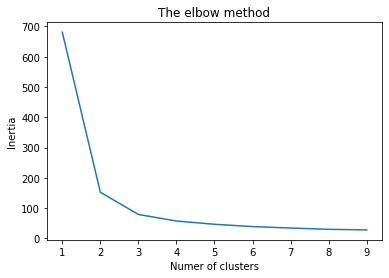

In [8]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init = 10, random_state=0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
    
#plotting the results onto a line graph
plt.plot(range(1,10),SSE)
plt.title('The elbow method')
plt.xlabel('Numer of clusters')
plt.ylabel('Inertia')
plt.show()
    

In [9]:
#applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
pred = kmeans.fit_predict(x)

In [10]:
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

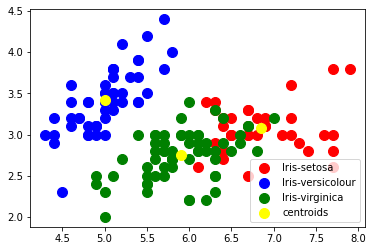

In [15]:
#plot the clusters obtained using k means
fig = plt.figure()
ad = fig.add_subplot(111)
plt.scatter(x[pred == 0,0],x[pred == 0,1], s=100 ,c='r',label = 'Iris-setosa')
plt.scatter(x[pred == 1,0],x[pred == 1,1], s=100, c='b',label = 'Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,1], s=100, c='g',label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c='yellow', label='centroids')

plt.legend()
